In [40]:
# Imports
import numpy as np
import time
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.backend import clear_session
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from scipy.stats import randint as sp_randint
from keras.layers import LeakyReLU
from sklearn.metrics import make_scorer, cohen_kappa_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from utility3 import load_data, plot_learning_curves, report, plot_lines1

In [41]:
#X_train_m, X_val_m, X_test_m, y_train_m, y_val_m, y_test_m, class_names_m = load_data('motions', scale=True, valset=True)
#X_train_p, X_val_p, X_test_p, y_train_p, y_val_p, y_test_p, class_names_p = load_data('particles', scale=True, valset=True)
X_train, X_val, X_test, y_train, y_val, y_test, class_names = load_data('motions', scale=True, valset=True)

# Load Data from the DR Algorithms

pca_m_data = np.load('pca_m_data.npy')
pca2_m_data = np.load('pca2_m_data.npy')
ica_m_data = np.load('ica_m_data.npy')
rca_m_data = np.load('rca_m_data.npy')
tsne_m_data = np.load('ica_m_tsne_X.npy')


[X_pca_m, X_val_pca_m, pca_m] = pca_m_data
[X_pca2_m, X_val_pca2_m, pca2_m] = pca2_m_data
[X_ica_m, X_val_ica_m, ica_m] = ica_m_data
[X_rca_m, X_val_rca_m, rca_m] = rca_m_data
X_tsne_m = tsne_m_data


########## BEST FOUND PARAMETERS from HW1 #####
n1 = 75
n2 = 14
mid_act = 'relu' #useleakyrelu is enabled...
num_layers = 3
optimizer = 'adam'
activation = 'sigmoid' 
epo = 100 #10
bat = 44 #18
##############################################

motions shapes: (11678, 64), (11678, 1)


In [42]:
# import cluster data for part 5

[pca_y_m, pca2_y_m, ica_y_m, rca_y_m, tsne_y_m, base_y_m] = np.load('motions_kmeans.npy')

[pca_y_val_m, pca2_y_val_m, ica_y_val_m, rca_y_val_m, tsne_y_val_m, base_y_val_m] = np.load('y_vals.npy')

In [43]:
km_y = [pca_y_m, pca2_y_m, ica_y_m, rca_y_m, tsne_y_m, base_y_m]
km_y_val = [pca_y_val_m, pca2_y_val_m, ica_y_val_m, rca_y_val_m, tsne_y_val_m, base_y_val_m]

km_y_fix = [a.reshape(7473, 1) for a in km_y]
#em_y_fix = [a.reshape(7473, 1) for a in em_y]
km_y_val_fix = [a.reshape(-1, 1) for a in km_y_val]

[pca_y_m, pca2_y_m, ica_y_m, rca_y_m, tsne_y_m, base_y_m] = km_y_fix
#[pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m] = em_y_fix
[pca_y_val_m, pca2_y_val_m, ica_y_val_m, rca_y_val_m, tsne_y_val_m, base_y_val_m] = km_y_val_fix

X_pca_km = np.concatenate((X_pca_m, pca_y_m), axis=1)
X_pca2_km = np.concatenate((X_pca2_m, pca2_y_m), axis=1)
X_ica_km = np.concatenate((X_ica_m, ica_y_m), axis = 1)
X_rca_km = np.concatenate((X_rca_m, rca_y_m), axis = 1)
X_tsne_km = np.concatenate((X_tsne_m, tsne_y_m), axis = 1)

X_val_pca_km = np.concatenate((X_val_pca_m, pca_y_val_m), axis=1)
X_val_pca2_km = np.concatenate((X_val_pca2_m, pca2_y_val_m), axis=1)
X_val_ica_km = np.concatenate((X_val_ica_m, ica_y_val_m), axis = 1)
X_val_rca_km = np.concatenate((X_val_rca_m, rca_y_val_m), axis = 1)
X_val_tsne_km = np.concatenate((X_tsne_m, tsne_y_val_m), axis = 1)

In [44]:
X_val.shape

(1869, 64)

In [45]:
kmeans_model = KMeans(n_clusters=26)
em_model = GaussianMixture(n_components=11)

In [16]:
X_train_list = [X_pca_km, X_pca2_km, X_ica_km, X_rca_km]
X_val_list = [X_val_pca_km, X_val_pca2_km, X_val_ica_km, X_val_rca_km]
name_list = ['pca-kmeans', 'pca2-kmeans', 'ica-kmeans', 'rca-kmeans']
model_results=[]

i = 0
for X_train, X_val in zip(X_train_list, X_val_list):
    print("Running {}".format(name_list[i]))
    print("----------------------------------")
    model = finalModel(X_train, y_train, X_val, y_val, learning_curves=False)
    model_results.append(model)
    i = i + 1
    print("----------------------------------")

Running pca-kmeans
----------------------------------


Fit time = 20.20740032196045
Pred time = 20.254200220108032
rock accuracy =   0.8366
paper accuracy =   0.7743
scissors accuracy =   0.6937
okay accuracy =   0.7412
Cohen Kappa: 0.6812584340652108
Accuracy: 0.7608346709470305
F1 Score: 0.7590822883688845
Precision: 0.7612330865922904
Recall: 0.7608346709470305
time elapsed: 20.346200227737427
----------------------------------
Running pca2-kmeans
----------------------------------


Fit time = 24.47819995880127
Pred time = 24.51919984817505
rock accuracy =   0.9412
paper accuracy =   0.9135
scissors accuracy =   0.9021
okay accuracy =   0.8794
Cohen Kappa: 0.8787178515275642
Accuracy: 0.9090422685928304
F1 Score: 0.9089485063841518
Precision: 0.9090060729419684
Recall: 0.9090422685928304
time elapsed: 24.602200031280518
----------------------------------
Running ica-kmeans
----------------------------------


Fit time = 20.052600145339966
Pred time = 20.083800077438354
rock accuracy =   0.8562
paper accuracy =   0.3481
scissors accuracy =   0.8333
okay accuracy =   0.8860
Cohen Kappa: 0.639053950898877
Accuracy: 0.7287319422150883
F1 Score: 0.73693801866472
Precision: 0.8121590808541521
Recall: 0.7287319422150883
time elapsed: 20.161800146102905
----------------------------------
Running rca-kmeans
----------------------------------


Fit time = 20.59599995613098
Pred time = 20.642800092697144
rock accuracy =   0.8780
paper accuracy =   0.7700
scissors accuracy =   0.8229
okay accuracy =   0.8706
Cohen Kappa: 0.7796838091227042
Accuracy: 0.8346709470304976
F1 Score: 0.8319767225653905
Precision: 0.8392020942573319
Recall: 0.8346709470304976
time elapsed: 20.752000093460083
----------------------------------


In [46]:
model_tsne = finalModel(X_tsne_km, y_train, X_tsne_km, y_train, learning_curves=False)

Fit time = 23.167800188064575
Pred time = 23.277000188827515
rock accuracy =   0.8805


paper accuracy =   0.9402
scissors accuracy =   0.7846
okay accuracy =   0.7469
Cohen Kappa: 0.7842675266366367
Accuracy: 0.8382175832998796
F1 Score: 0.8396058200976501
Precision: 0.845434518216284


Recall: 0.8382175832998796
time elapsed: 23.58900022506714


In [47]:
[X_pca_m, X_val_pca_m, pca_m] = pca_m_data
[X_pca2_m, X_val_pca2_m, pca2_m] = pca2_m_data
[X_ica_m, X_val_ica_m, ica_m] = ica_m_data
[X_rca_m, X_val_rca_m, rca_m] = rca_m_data
X_tsne_m = tsne_m_data

In [48]:
[pca_y2_val_gm, pca2_y2_val_gm, ica_y2_val_gm, rca_y2_val_gm] = np.load('motions_val_em.npy')
[pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m] = np.load('motions_em.npy')


In [49]:
#km_y = [pca_y_m, pca2_y_m, ica_y_m, rca_y_m, tsne_y_m, base_y_m]
#em_y = [pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m]
#km_y_val = [pca_y_val_m, pca2_y_val_m, ica_y_val_m, rca_y_val_m, tsne_y_val_m, base_y_val_m]

em_y = [pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m]
gm_y_val = [pca_y2_val_gm, pca2_y2_val_gm, ica_y2_val_gm, rca_y2_val_gm]

#km_y_fix = [a.reshape(7473, 1) for a in km_y]
em_y_fix = [a.reshape(7473, 1) for a in em_y]
#km_y_val_fix = [a.reshape(-1, 1) for a in km_y_val]
gm_y_val_fix = [a.reshape(-1, 1) for a in gm_y_val]

#[pca_y_m, pca2_y_m, ica_y_m, rca_y_m, tsne_y_m, base_y_m] = km_y_fix
[pca_y2_m, pca2_y2_m, ica_y2_m, rca_y2_m, tsne_y2_m, base_y2_m] = em_y_fix
#[pca_y_val_m, pca2_y_val_m, ica_y_val_m, rca_y_val_m, tsne_y_val_m, base_y_val_m] = km_y_val_fix
[pca_y_val_gm, pca2_y_val_gm, ica_y_val_gm, rca_y_val_gm] = gm_y_val_fix

X_pca_gm = np.concatenate((X_pca_m, pca_y2_m), axis=1)
X_pca2_gm = np.concatenate((X_pca2_m, pca2_y2_m), axis=1)
X_ica_gm = np.concatenate((X_ica_m, ica_y2_m), axis = 1)
X_rca_gm = np.concatenate((X_rca_m, rca_y2_m), axis = 1)
X_tsne_gm = np.concatenate((X_tsne_m, tsne_y2_m), axis = 1)

X_val_pca_gm = np.concatenate((X_val_pca_m, pca_y_val_gm), axis=1)
X_val_pca2_gm = np.concatenate((X_val_pca2_m, pca2_y_val_gm), axis=1)
X_val_ica_gm = np.concatenate((X_val_ica_m, ica_y_val_gm), axis = 1)
X_val_rca_gm = np.concatenate((X_val_rca_m, rca_y_val_gm), axis = 1)
#X_val_tsne_gm = np.concatenate((X_tsne_m, tsne_y_val_gm), axis = 1)

In [26]:
X_train_list_gm = [X_pca_gm, X_pca2_gm, X_ica_gm, X_rca_gm]
X_val_list_gm = [X_val_pca_gm, X_val_pca2_gm, X_val_ica_gm, X_val_rca_gm]
name_list = ['pca-gm', 'pca2-gm', 'ica-gm', 'rca-gm']
model_results_gm=[]

pca_params = {'n1':75, 'n2': 14, 'n3':14, 'num_layers':3, 'optimizer':'adam', 'activation':'sigmoid', 'epo':15, 'bat':46}
pca2_params = pca_params
rca_params = pca_params
ica_params = {'n1':218, 'n2': 218, 'n3':256, 'num_layers':3, 'optimizer':'adamax', 'activation':'softmax', 'epo':17, 'bat':46}

other_params_list = [pca_params, pca2_params, ica_params, rca_params]

i = 0
for X_train, X_val, other_params in zip(X_train_list_gm, X_val_list_gm, other_params_list):
    print("Running {}".format(name_list[i]))
    print("----------------------------------")
    model = finalModel(X_train, y_train, X_val, y_val, learning_curves=False)
    model_results_gm.append(model)
    i = i + 1
    print("----------------------------------")

Running pca-gm
----------------------------------


Fit time = 18.3503999710083
Pred time = 18.412799835205078
rock accuracy =   0.8649
paper accuracy =   0.6371
scissors accuracy =   0.6292
okay accuracy =   0.4232
Cohen Kappa: 0.517877595194884
Accuracy: 0.6388443017656501
F1 Score: 0.6399239403715732
Precision: 0.6674273900815261
Recall: 0.6388443017656501
time elapsed: 18.507399797439575
----------------------------------
Running pca2-gm
----------------------------------


Fit time = 20.74940013885498
Pred time = 20.78060007095337
rock accuracy =   0.9630
paper accuracy =   0.9367
scissors accuracy =   0.9437
okay accuracy =   0.8596
Cohen Kappa: 0.9015216076533978
Accuracy: 0.9261637239165329
F1 Score: 0.9264556229829138
Precision: 0.9272585178370211
Recall: 0.9261637239165329
time elapsed: 20.874200105667114
----------------------------------
Running ica-gm
----------------------------------


Fit time = 18.52560019493103
Pred time = 18.556800365447998
rock accuracy =   0.8649
paper accuracy =   0.0169
scissors accuracy =   0.0292
okay accuracy =   0.2500
Cohen Kappa: 0.04490395428361604
Accuracy: 0.28517924023542
F1 Score: 0.2643235831169321
Precision: 0.2492624837194474
Recall: 0.28517924023542
time elapsed: 18.63480019569397
----------------------------------
Running rca-gm
----------------------------------


Fit time = 18.14240026473999
Pred time = 18.189200401306152
rock accuracy =   0.7560
paper accuracy =   0.9135
scissors accuracy =   0.1437
okay accuracy =   0.8531
Cohen Kappa: 0.5508511951007724
Accuracy: 0.6623863028357411
F1 Score: 0.6975321106908337
Precision: 0.7627602569825627
Recall: 0.6623863028357411
time elapsed: 18.25160026550293
----------------------------------


In [50]:
from sklearn.preprocessing import StandardScaler

tsne_gm_scaler = StandardScaler()
X_tsne_gm_scaled = tsne_gm_scaler.fit_transform(X_tsne_gm)

model_tsne_gm = finalModel(X_tsne_gm_scaled, y_train, X_tsne_gm_scaled, y_train, learning_curves=False)

Fit time = 20.343000173568726
Pred time = 20.46780014038086
rock accuracy =   0.8634


paper accuracy =   0.9578
scissors accuracy =   0.8067
okay accuracy =   0.7192
Cohen Kappa: 0.7824911423202056
Accuracy: 0.8368794326241135
F1 Score: 0.8385339344347394


Precision: 0.8477033964821497
Recall: 0.8368794326241135
time elapsed: 20.748600006103516


In [ ]:
tsne_gm_scaler = StandardScaler()
X_tsne_gm_scaled = tsne_gm_scaler.fit_transform(X_tsne_gm)

model_tsne_gm = finalModel(X_tsne_gm_scaled, y_train, X_tsne_gm_scaled, y_train, learning_curves=False)

In [55]:
#combining perplexity settings
tsne_set = np.load('X_tsne_m_set.npy')
tsne_set[0].shape

(7473, 2)

In [58]:
tsne_combined_perplexity = tsne_set[0]
for i in range(6):
    tsne_combined_perplexity = np.concatenate((tsne_combined_perplexity, tsne_set[i]), axis=1)

tsne_combined_perplexity.shape

(7473, 14)

In [59]:
from collections import defaultdict
result_tsne_combo = defaultdict(list)
for param in range(1, 64, 4):
    gm_combined_tsne = GaussianMixture(n_components=param)
    gm_combined_tsne.fit(tsne_combined_perplexity)
    X_tsne_gm_combo = gm_combined_tsne.predict_proba(tsne_combined_perplexity)
    
    result_tsne_combo[param] = finalModel(X_tsne_gm_combo, y_train, X_tsne_gm_combo, y_train, learning_curves=False)

Fit time = 20.105000257492065
Pred time = 20.214200258255005
rock accuracy =   1.0000


paper accuracy =   0.0000
scissors accuracy =   0.0000
okay accuracy =   0.0000
Cohen Kappa: 0.0
Accuracy: 0.2507694366385655
F1 Score: 0.40098427302877926
Precision: 1.0


C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\eking\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Recall: 0.2507694366385655
time elapsed: 20.49500012397766


Fit time = 18.924400091171265
Pred time = 19.0492000579834
rock accuracy =   0.8330


paper accuracy =   0.6398
scissors accuracy =   0.1317
okay accuracy =   0.2894
Cohen Kappa: 0.2988939109676929
Accuracy: 0.47450822962665595
F1 Score: 0.5163936003544786
Precision: 0.6079067824196012


Recall: 0.47450822962665595
time elapsed: 19.382800102233887


Fit time = 21.485000133514404
Pred time = 21.57859992980957
rock accuracy =   0.3661
paper accuracy =   0.4835


scissors accuracy =   0.5227
okay accuracy =   0.4373
Cohen Kappa: 0.2698940312316165
Accuracy: 0.4521611133413622
F1 Score: 0.4458831228529681
Precision: 0.473150731829698
Recall: 0.4521611133413622
time elapsed: 21.828200340270996


Fit time = 18.21500015258789
Pred time = 18.308599948883057
rock accuracy =   0.8138
paper accuracy =   0.3778


scissors accuracy =   0.0940
okay accuracy =   0.5238
Cohen Kappa: 0.27063643382961755
Accuracy: 0.4533654489495517
F1 Score: 0.4948157233690734
Precision: 0.5847635618399473
Recall: 0.4533654489495517
time elapsed: 18.558200120925903


Fit time = 18.677000284194946
Pred time = 18.77060031890869
rock accuracy =   0.6147


paper accuracy =   0.4312
scissors accuracy =   0.2570
okay accuracy =   0.5686
Cohen Kappa: 0.29102009606597834
Accuracy: 0.46848655158570857
F1 Score: 0.47311275934574615
Precision: 0.5048532575109432


Recall: 0.46848655158570857
time elapsed: 19.09820008277893


Fit time = 18.219000101089478
Pred time = 18.328199863433838
rock accuracy =   0.5928


paper accuracy =   0.5342
scissors accuracy =   0.3623
okay accuracy =   0.4939
Cohen Kappa: 0.3282502252090772
Accuracy: 0.4961862705740666
F1 Score: 0.49239354134313956


Precision: 0.49212524644124905
Recall: 0.4961862705740666
time elapsed: 18.655800104141235


Fit time = 17.865400075912476
Pred time = 17.960000038146973
rock accuracy =   0.7823
paper accuracy =   0.6094


scissors accuracy =   0.2252
okay accuracy =   0.5099
Cohen Kappa: 0.3764482459732972
Accuracy: 0.5325839689549043
F1 Score: 0.55407904718904
Precision: 0.5997748005689054
Recall: 0.5325839689549043
time elapsed: 18.225200176239014


Fit time = 18.00660014152527
Pred time = 18.100200176239014
rock accuracy =   0.7401
paper accuracy =   0.7177


scissors accuracy =   0.2446
okay accuracy =   0.4325
Cohen Kappa: 0.37915909767499245
Accuracy: 0.5345911949685535
F1 Score: 0.5548261764481562
Precision: 0.6014941194691268
Recall: 0.5345911949685535
time elapsed: 18.34980010986328


Fit time = 18.02280020713806
Pred time = 18.132000207901
rock accuracy =   0.6889
paper accuracy =   0.6275


scissors accuracy =   0.3866
okay accuracy =   0.4677
Cohen Kappa: 0.39081089621575915
Accuracy: 0.5431553592934565
F1 Score: 0.5453959184768372
Precision: 0.5505627310676505
Recall: 0.5431553592934565
time elapsed: 18.366000175476074


Fit time = 18.804800033569336
Pred time = 18.914000034332275
rock accuracy =   0.6121


paper accuracy =   0.5027
scissors accuracy =   0.5178
okay accuracy =   0.5499
Cohen Kappa: 0.394382971153885
Accuracy: 0.545697845577412
F1 Score: 0.5395921342590404
Precision: 0.542460835308914
Recall: 0.545697845577412
time elapsed: 19.163600206375122


Fit time = 18.64960026741028
Pred time = 18.758800268173218
rock accuracy =   0.7535


paper accuracy =   0.5966
scissors accuracy =   0.2948
okay accuracy =   0.5659
Cohen Kappa: 0.404346507063302
Accuracy: 0.5534591194968553
F1 Score: 0.5663534824608112
Precision: 0.5965427251793801


Recall: 0.5534591194968553
time elapsed: 19.039600133895874


Fit time = 18.422600030899048
Pred time = 18.516200065612793
rock accuracy =   0.5880


paper accuracy =   0.6105
scissors accuracy =   0.5086
okay accuracy =   0.5670
Cohen Kappa: 0.42499349922539786
Accuracy: 0.5687140372005888
F1 Score: 0.5627335327807695
Precision: 0.5667880838092458
Recall: 0.5687140372005888


time elapsed: 18.812600135803223


Fit time = 18.23800015449524
Pred time = 18.331600189208984
rock accuracy =   0.7188
paper accuracy =   0.7022


scissors accuracy =   0.3143
okay accuracy =   0.5275
Cohen Kappa: 0.42166865837008793
Accuracy: 0.5664391810517865
F1 Score: 0.5780334194159203


Precision: 0.6086220920461672
Recall: 0.5664391810517865
time elapsed: 18.659199953079224


Fit time = 18.342600107192993
Pred time = 18.451800107955933
rock accuracy =   0.7022


paper accuracy =   0.5480
scissors accuracy =   0.3402
okay accuracy =   0.6770
Cohen Kappa: 0.4231415415427656
Accuracy: 0.5675097015923993


F1 Score: 0.5730225216345523
Precision: 0.6032890883229927
Recall: 0.5675097015923993
time elapsed: 18.801000118255615


Fit time = 18.62280011177063
Pred time = 18.73200011253357
rock accuracy =   0.7086
paper accuracy =   0.6660


scissors accuracy =   0.3634
okay accuracy =   0.5910
Cohen Kappa: 0.44366741547829625
Accuracy: 0.5828984343637094
F1 Score: 0.5891209820621567
Precision: 0.6069625690953884
Recall: 0.5828984343637094
time elapsed: 18.99720025062561


Fit time = 19.3334002494812
Pred time = 19.44260025024414
rock accuracy =   0.7305
paper accuracy =   0.5555


scissors accuracy =   0.4131
okay accuracy =   0.6113
Cohen Kappa: 0.4373216001050737
Accuracy: 0.5780810919309515
F1 Score: 0.5810874526277968
Precision: 0.5914892932108669


Recall: 0.5780810919309515
time elapsed: 19.754600286483765


Fit time = 20.709800004959106
Pred time = 20.75659990310669
rock accuracy =   0.8824
paper accuracy =   0.8143
scissors accuracy =   0.7229
okay accuracy =   0.7368
Cohen Kappa: 0.7182351122662789
Accuracy: 0.7886570358480471
F1 Score: 0.7894864480365962
Precision: 0.7911094146005148
Recall: 0.7886570358480471


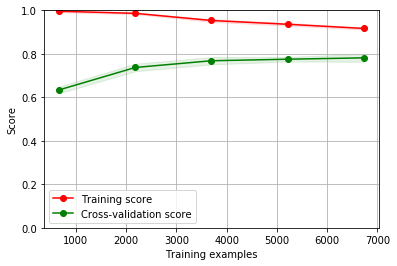

time elapsed: 827.1396040916443


In [6]:
#Truncated PCA
pca_model = finalModel(X_pca_m, y_train, X_val_pca_m, y_val, learning_curves=True)

Fit time = 22.297800302505493
Pred time = 22.323800325393677
rock accuracy =   0.9608
paper accuracy =   0.9451
scissors accuracy =   0.9021
okay accuracy =   0.9123
Cohen Kappa: 0.9065475031775658
Accuracy: 0.9299090422685928
F1 Score: 0.9298101928157596
Precision: 0.9300004542585112
Recall: 0.9299090422685928


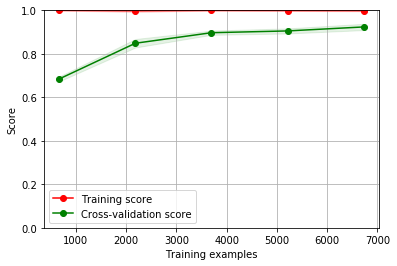

time elapsed: 777.7676043510437


In [7]:
clear_session() #clear the keras session - omg so important!!!!
# #Full PCA
pca2_model = finalModel(X_pca2_m, y_train, X_val_pca2_m, y_val, learning_curves=True)

Fit time = 22.505000352859497
Pred time = 22.55400013923645
rock accuracy =   0.9564
paper accuracy =   0.9451
scissors accuracy =   0.9062
okay accuracy =   0.8816
Cohen Kappa: 0.896545642571408
Accuracy: 0.922418405564473
F1 Score: 0.9224053730602458
Precision: 0.9224056521441175
Recall: 0.922418405564473


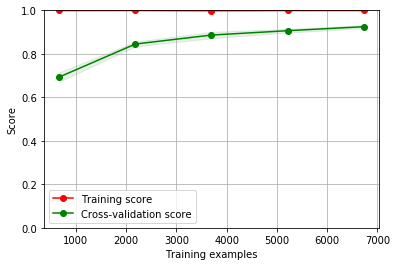

time elapsed: 937.7464048862457


In [9]:
clear_session() #clear the keras session - omg so important!!!!
#Base
base_model = finalModel(X_train, y_train, X_val, y_val, learning_curves=True)

Fit time = 22.701200246810913
Pred time = 22.75000023841858
rock accuracy =   0.9194
paper accuracy =   0.9451
scissors accuracy =   0.8771
okay accuracy =   0.8640
Cohen Kappa: 0.8687399807630651
Accuracy: 0.9015516318887106
F1 Score: 0.901369577081614
Precision: 0.9022480962694509
Recall: 0.9015516318887106


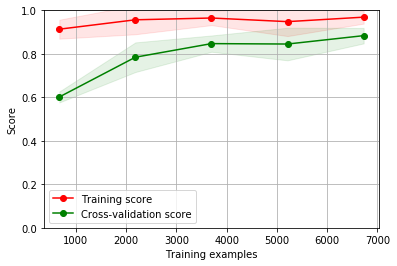

time elapsed: 904.345803976059


In [17]:
clear_session() #clear the keras session - omg so important!!!!
# ICA
ica_model = finalModel(X_ica_m, y_train, X_val_ica_m, y_val, learning_curves=True)

Fit time = 21.313600301742554
Pred time = 21.36240029335022
rock accuracy =   0.9150
paper accuracy =   0.8903
scissors accuracy =   0.8417
okay accuracy =   0.8421
Cohen Kappa: 0.8295087485873216
Accuracy: 0.8721241305510968
F1 Score: 0.8716247454844681
Precision: 0.8717783358626454
Recall: 0.8721241305510968


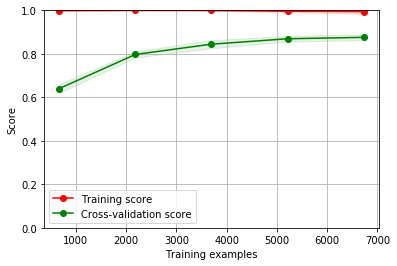

time elapsed: 953.9480037689209


In [17]:
clear_session() #clear the keras session - omg so important!!!!
# RCA
rca_model = finalModel(X_rca_m, y_train, X_val_rca_m, y_val, learning_curves=True)

Fit time = 20.54640007019043
Pred time = 20.671200037002563
rock accuracy =   0.8282


paper accuracy =   0.9397
scissors accuracy =   0.8180
okay accuracy =   0.7517
Cohen Kappa: 0.7792865086962051
Accuracy: 0.8344707614077345
F1 Score: 0.8352431606169386


Precision: 0.8402388211231164
Recall: 0.8344707614077345


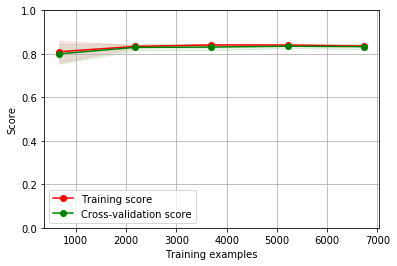

time elapsed: 882.982405424118


In [17]:
clear_session() #clear the keras session - omg so important!!!!
# TSNE
tsne_model = finalModel(X_tsne_m, y_train, X_tsne_m, y_train, learning_curves=True)

In [17]:
print('yippie kai yai yay!')

yippie kai yai yay!


In [ ]:
# Using GridSearchCV to find optimum settings
time1 = time.time()

# CV Settings
useRandomCV = False
useGridCV = False
if useRandomCV:

    # specify parameters and distributions to sample from
    param_dist = {"n1": sp_randint(15, 80),
              "n2": sp_randint(10, 80),
              "n3": sp_randint(10, 80),              
              "epochs": sp_randint(30, 60),
              "batch_size": sp_randint(20, 100),
              "optimizer":['rmsprop', 'nadam', 'adagrad'],
              "activation": ['softmax', 'sigmoid', 'softplus']
              }

    
    n_iter_search = 100
    random_search = RandomizedSearchCV(model, param_distributions = param_dist, n_iter=n_iter_search, cv = 3, scoring=scorer, verbose=10)    
    random_search.fit(X_train, y_train)
    report(random_search.cv_results_)
    #scores = random_search.cv_results_['mean_test_score']
if useGridCV:

    # grid setup
    optimizers = ['adam']
    activations = ['softplus', 'sigmoid'] #['sigmoid', 'softmax', 'softplus']
    #inits = ['glorot_uniform', 'normal', 'uniform']
    epochs = [15] #range(10, 100, 20)
    batches = [33] #range(50, 500, 50)
    n1s = [73, 75, 77]
    n2s = [12, 14, 16]  
    n3s = [14, 16, 18]  #3 x 3 x 3 x 2 = 54
    param_grid = dict(nb_epoch = epochs, batch_size = batches, n1=n1s, n2=n2s, n3=n3s, optimizer=optimizers, activation = activations)
    grid = GridSearchCV(estimator = model, param_grid=param_grid, cv=3, verbose = 10, pre_dispatch = 4, scoring = scorer)
    grid_result = grid.fit(X_train, y_train)
    print("time elapsed: {}".format(time.time()-time1))
    
    best_model = grid.best_estimator_
    print(grid.best_score_, grid.best_params_)
    
    # What the test accuracy by class
    for motion_type in class_names:
        pred_score = best_model.score(X_val[y_val.motion_type==motion_type], y_val[y_val.motion_type==motion_type])
        print("{} accuracy = {p:8.4f}".format(motion_type, p=pred_score))
    
    history = best_model.fit(X_train, y_train)
    plt.plot(history.history['acc'])
    plt.plot(history.history['loss'])
    
    for motion_type in class_names:
        pred_score = best_model.score(X_val[y_val.motion_type==motion_type], y_val[y_val.motion_type==motion_type])
        print("{} accuracy = {p:8.4f}".format(motion_type, p=pred_score))
    
    # graphing mean training and mean test scores
    params = grid.cv_results_['params']
    n1 = [param['n1'] for param in params]
    n2 = [param['n2'] for param in params]
    plt.plot(n1, grid.cv_results_['mean_test_score'])
    plt.plot(n2, grid.cv_results_['mean_test_score'])
    plt.show()
    
    report(grid.cv_results_)


In [ ]:
test_epochs = False
if test_epochs:
    test_parameter = 'Epochs'
    n_range = range(5, 200, 5) 
    
    scores= {}
    scores_list = []
    time_list = []
    
    for n in n_range:
        # Motions
        clear_session() #clear the keras session - omg so important!!!!
        t1 = time.time()
        print("looking at {} = {} on Motions Set".format(test_parameter, n))
        model = KerasClassifier(build_fn=classification_model, n2=n2, epochs=n, batch_size=bat, verbose=0)
        model.fit(X_train, y_train.values.ravel('C'))
        y_pred = model.predict(X_val)
        scores[n] = accuracy_score(y_val, y_pred)
        scores_list.append(scores[n])
        print("took {} seconds".format(time.time()-t1))
        time_list.append(time.time()-t1)
        
    # matplotlib is clunky in trying to plot bars side by side, BUT
    plot_lines1(scores_list, time_list, test_parameter, n_range, label='Motions', col='blue')    


In [ ]:
plot_curves = False
if plot_curves:
    # Plot the learning curve of the best model found
    # use X_train1 and use learning_curve to do the cv's
    print(X_train.shape, y_train.shape)
    #from sklearn.model_selection import learning_curve
    title="learning curve for best model with extended epochs"
    
    model3 = KerasClassifier(build_fn=classification_model, optimizer='rmsprop', epochs=epo, batch_size=bat, verbose=0)
    model4 = KerasClassifier(build_fn=classification_model, optimizer='adam', epochs=epo, batch_size=bat, verbose=0)
    model5 = KerasClassifier(build_fn=classification_model, optimizer='adamax', epochs=epo, batch_size=bat, verbose=0)
    model6 = KerasClassifier(build_fn=classification_model, optimizer='adagrad', epochs=epo, batch_size=bat, verbose=0)

    start = time.time()
    history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=0)
    t1 = time.time()
    history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=0)
    t2 = time.time()
    history5 = model5.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=0)
    t3 = time.time()
    history6 = model6.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=0)
    t4 = time.time()
    
    print("rmsprop time: {} adam time: {}, adamax time:{}, adagrad time: {}".format(t1-start, t2-t1, t3-t2, t4-t3))
    
    x = np.arange(4)
    plt.bar(x, [t1-start, t2-t1, t3-t2, t4-t3], color='darkorchid')
    plt.ylabel('run time')
    plt.xticks(x, ('rmsprop', 'adam', 'adamax', 'adagrad'))
    plt.xlabel('num_layers')
    plt.show()
    
    labels = ['train-rmsprop', 'val-rmsprop', 'train-adam', 'val-adam', 'train-adamax', 'val-adamax', 'train-adagrad', 'val-adagrad']
    
    # summarize history for accuracy
    plt.plot(history3.history['acc'])
    plt.plot(history3.history['val_acc'])
    
    plt.plot(history4.history['acc'])
    plt.plot(history4.history['val_acc'])
    
    plt.plot(history5.history['acc'])
    plt.plot(history5.history['val_acc'])
    
    plt.plot(history6.history['acc'])
    plt.plot(history6.history['val_acc'])
    
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(labels, loc='lower right')
    plt.show()
    # summarize history for loss
    plt.plot(history3.history['loss'])
    plt.plot(history3.history['val_loss'])
    
    plt.plot(history4.history['loss'])
    plt.plot(history4.history['val_loss'])
    
    plt.plot(history5.history['loss'])
    plt.plot(history5.history['val_loss'])
    
    plt.plot(history6.history['loss'])
    plt.plot(history6.history['val_loss'])
    
    
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim(0, 1.5)
    plt.legend(labels, loc='upper right')
    plt.show()

In [14]:
#Build the model
useLeakyReLU = True  # as an "advanced" activation function, it must be added as its own layer not as a parameter on another layer

if useLeakyReLU == False:
    def classification_model(n1=n1, n2=n2, n3 =n2, input_dim=64, mid_act = mid_act, num_layers = num_layers, optimizer = optimizer, activation = activation):
        model = Sequential()
        model.add(Dense(n1, input_dim=input_dim, activation=mid_act))
        model.add(Dense(n2, activation=mid_act))
        for i in range(num_layers-2):
            model.add(Dense(n3, activation=mid_act))
        model.add(Dense(4, activation=activation))
        model.compile(optimizer= optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model
else:
    def classification_model(n1=n1, n2=n2, n3 =n2, input_dim=64, mid_act = mid_act, num_layers = num_layers, optimizer = optimizer, activation = activation):
        model = Sequential()
        model.add(Dense(n1, input_dim=input_dim))
        model.add(LeakyReLU())
        model.add(Dense(n2))
        model.add(LeakyReLU())
        for i in range(num_layers-2):
            model.add(Dense(n3))
            model.add(LeakyReLU())
        model.add(Dense(4, activation=activation))
        model.compile(optimizer= optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

#model = KerasClassifier(build_fn=classification_model, epochs=epo, batch_size=bat, verbose=0)

scorer = make_scorer(cohen_kappa_score)

In [15]:
# Final Model
#finalModel = True
def finalModel(X_train, y_train, X_test, y_test, learning_curves = True, 
               classification_model=classification_model, class_names=class_names):
    clear_session()
    ########## BEST FOUND PARAMETERS from HW1 #####
    n1 = 75
    n2 = 14
    mid_act = 'relu' #useleakyrelu is enabled...
    num_layers = 3
    optimizer = 'adam'
    activation = 'sigmoid' 
    epo = 100 #10
    bat = 44 #18
    ##############################################
    t0 = time.time()
    best_model = KerasClassifier(build_fn=classification_model, input_dim=X_train.shape[1], verbose=0)
    #model3 = KerasClassifier(build_fn=classification_model, optimizer='rmsprop', epochs=epo, batch_size=bat, verbose=0)
    
    t_fit = time.time()
    best_model.fit(X_train, y_train, batch_size=bat, epochs=epo)  #train on the whole training set
    print("Fit time = {}".format(time.time()-t_fit))
    t_pred = time.time()
    y_pred = best_model.predict(X_test)
    print("Pred time = {}".format(time.time()-t_fit))
    for motion_type in class_names:
        pred_score = best_model.score(X_test[y_test == motion_type], y_test[y_test == motion_type])
        print("{} accuracy = {p:8.4f}".format(motion_type, p=pred_score))
    print("Cohen Kappa: {}".format(cohen_kappa_score(y_pred, y_test)))   
    print("Accuracy: {}".format(accuracy_score(y_pred, y_test)))
    print("F1 Score: {}".format(f1_score(y_pred, y_test, average='weighted')))
    print("Precision: {}".format(precision_score(y_pred, y_test, average='weighted')))
    print("Recall: {}".format(recall_score(y_pred, y_test, average='weighted')))

    #learning_curves = True
    if learning_curves:
        clear_session()
        estimator = KerasClassifier(build_fn=classification_model, input_dim=X_train.shape[1], epochs=epo, batch_size=bat, verbose=0)
        #scorer = make_scorer(cohen_kappa_score)
        plot_learning_curves(estimator, X_train, y_train, title = "Neural Network - Motions Set - Post-Tuning Learning Curves", low_limit=0.0, ravel=False)
    
    
    print("time elapsed: {}".format(time.time()-t0))
    
    return best_model

In [ ]:
# References
# https://www.tensorflow.org/tutorials/keras/basic_classification
# https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
# http://thedatascientist.com/performance-measures-cohens-kappa-statistic/
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py